# <font color ='red'> Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# <font color = 'Red'> Importing Data 

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# <font color = 'red'> EDA

###### Checking Datatypes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


###### We can see 'State' column is a DataType of 'Object' and remaining all are 'Float' DataType

###### Now we will see the amount of influence this 'State' column has on our Data set
###### To check these we will perform certain actions on this Particular column

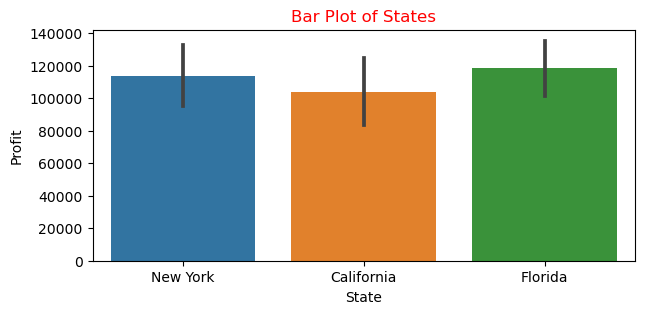

In [4]:
plt.figure(figsize=[7,3])
sns.barplot(x='State',y='Profit',data=data)
plt.title('Bar Plot of States', fontdict={'color':'red'})
plt.show()

###### Let us see the num of unique values in this column

In [5]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

###### We can see all the unique values have almost same frequency and each state has almost same profits

###### Now to check the correlation between our response variable and 'State' column we first transform this Object column into Numerical Column by giving unique labels to unique values

In [6]:
lec = preprocessing.LabelEncoder()
data['State Id'] = lec.fit_transform(data['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State Id
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [7]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State Id
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
State Id,0.104685,0.011847,0.077670,0.101796,1.000000


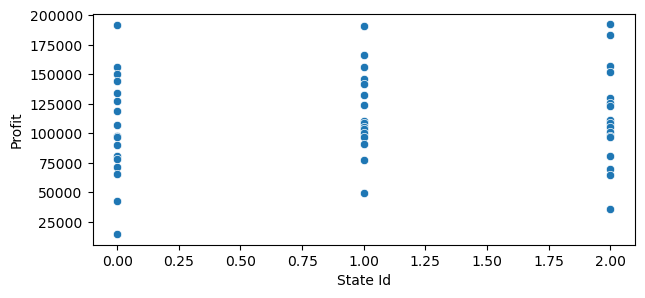

In [8]:
plt.figure(figsize=[7,3])
sns.scatterplot(x='State Id',y='Profit',data=data)
plt.show()

###### Since the correlation between States and Profit is very less we can drop the 'State' Column 

In [9]:
data = data.drop(['State','State Id'], axis=1)
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


###### <font color = 'green'>Renaming Columns and checking for null and duplicate values

In [10]:
df=data.rename(columns={'R&D Spend':'rnd','Administration':'adm','Marketing Spend':'mkt'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rnd     50 non-null     float64
 1   adm     50 non-null     float64
 2   mkt     50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [12]:
df.isnull().sum()

rnd       0
adm       0
mkt       0
Profit    0
dtype: int64

In [13]:
df[df.duplicated()]

,rnd,adm,mkt,Profit


##### <font color ='green'> Observing Correlation among each and every Variable

In [14]:
df.corr()

,rnd,adm,mkt,Profit
rnd,1.000000,0.241955,0.724248,0.972900
adm,0.241955,1.000000,-0.032154,0.200717
mkt,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


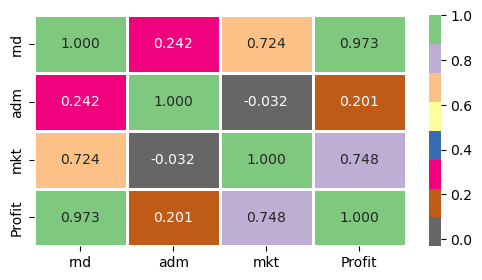

In [15]:
plt.figure(figsize=[6,3])
sns.heatmap(df.corr(),annot=True, fmt=".3f",cmap='Accent_r', linewidths=1,linecolor='white')
plt.show()

<Figure size 640x480 with 0 Axes>

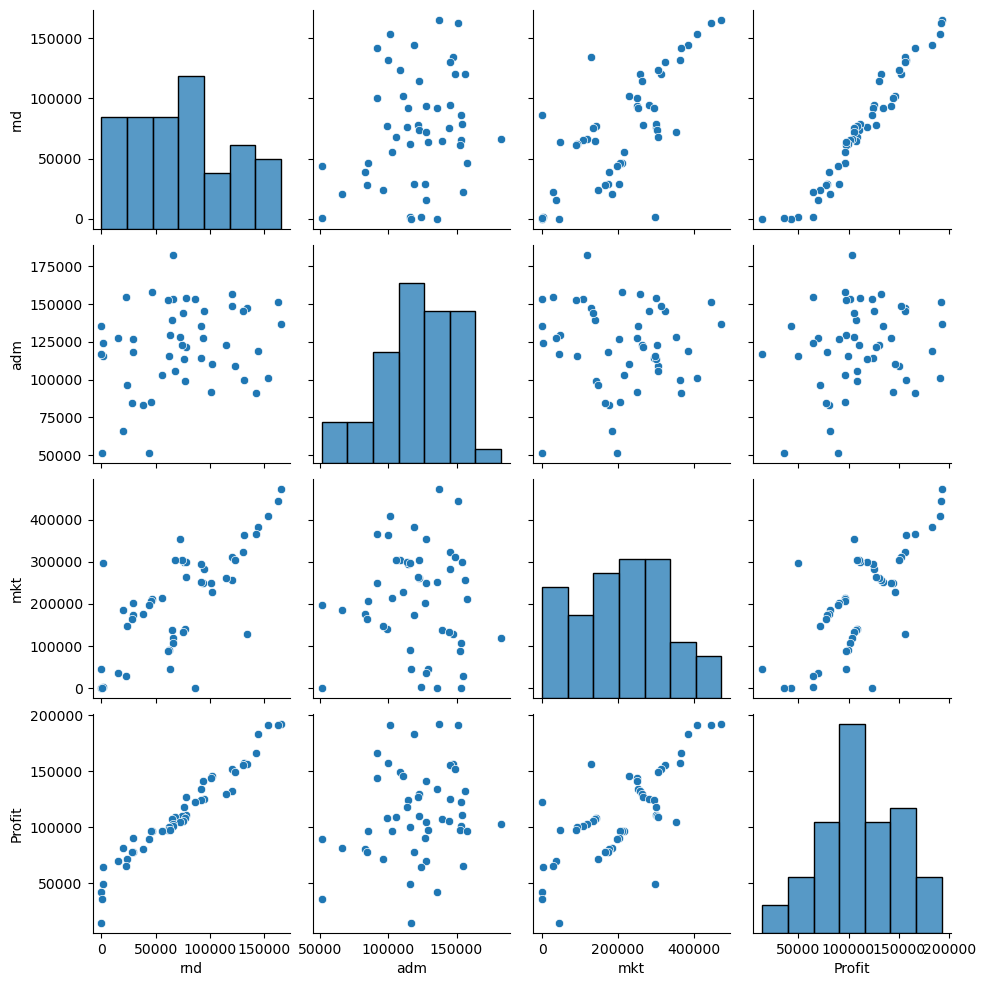

In [16]:
plt.figure()
sns.pairplot(df)
plt.show()

###### Checking for Outliers using Boxplots

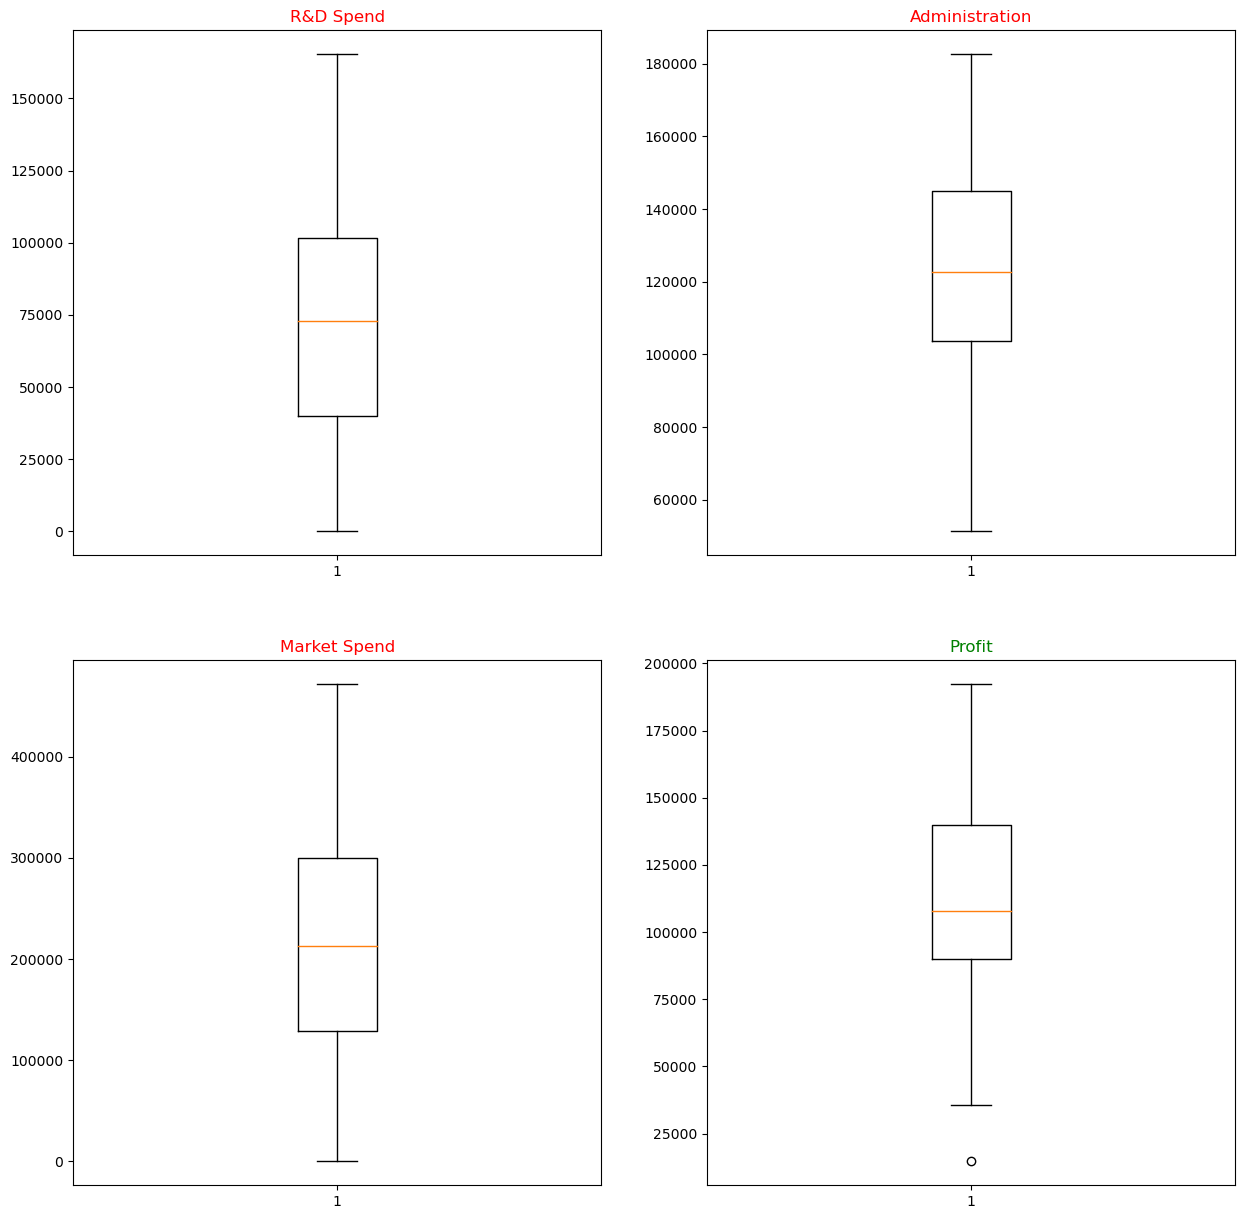

In [17]:
plt.subplots(2,2,figsize=(15,15))
plt.subplot(221)
plt.boxplot(df['rnd'])
plt.title('R&D Spend', fontdict={'color':'red'})
plt.subplot(222)
plt.boxplot(df['adm'])
plt.title('Administration', fontdict={'color':'red'})
plt.subplot(223)
plt.boxplot(df['mkt'])
plt.title('Market Spend', fontdict={'color':'red'})
plt.subplot(224)
plt.boxplot(df['Profit'])
plt.title('Profit', fontdict={'color':'green'})
plt.show()

###### We can observe no Outliers in the data set except one in Profit Column

###### Let us examine this Column very closely

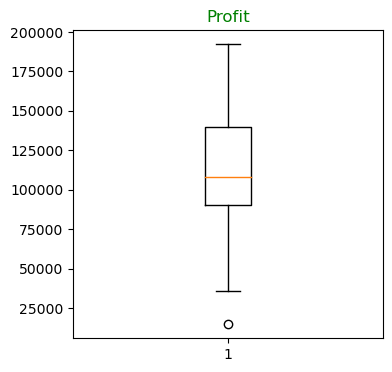

In [18]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Profit'])
plt.title('Profit', fontdict={'color':'green'})
plt.show()

###### Before removing this outlier, let us try some transformations on the Profit Column to solve this problem 

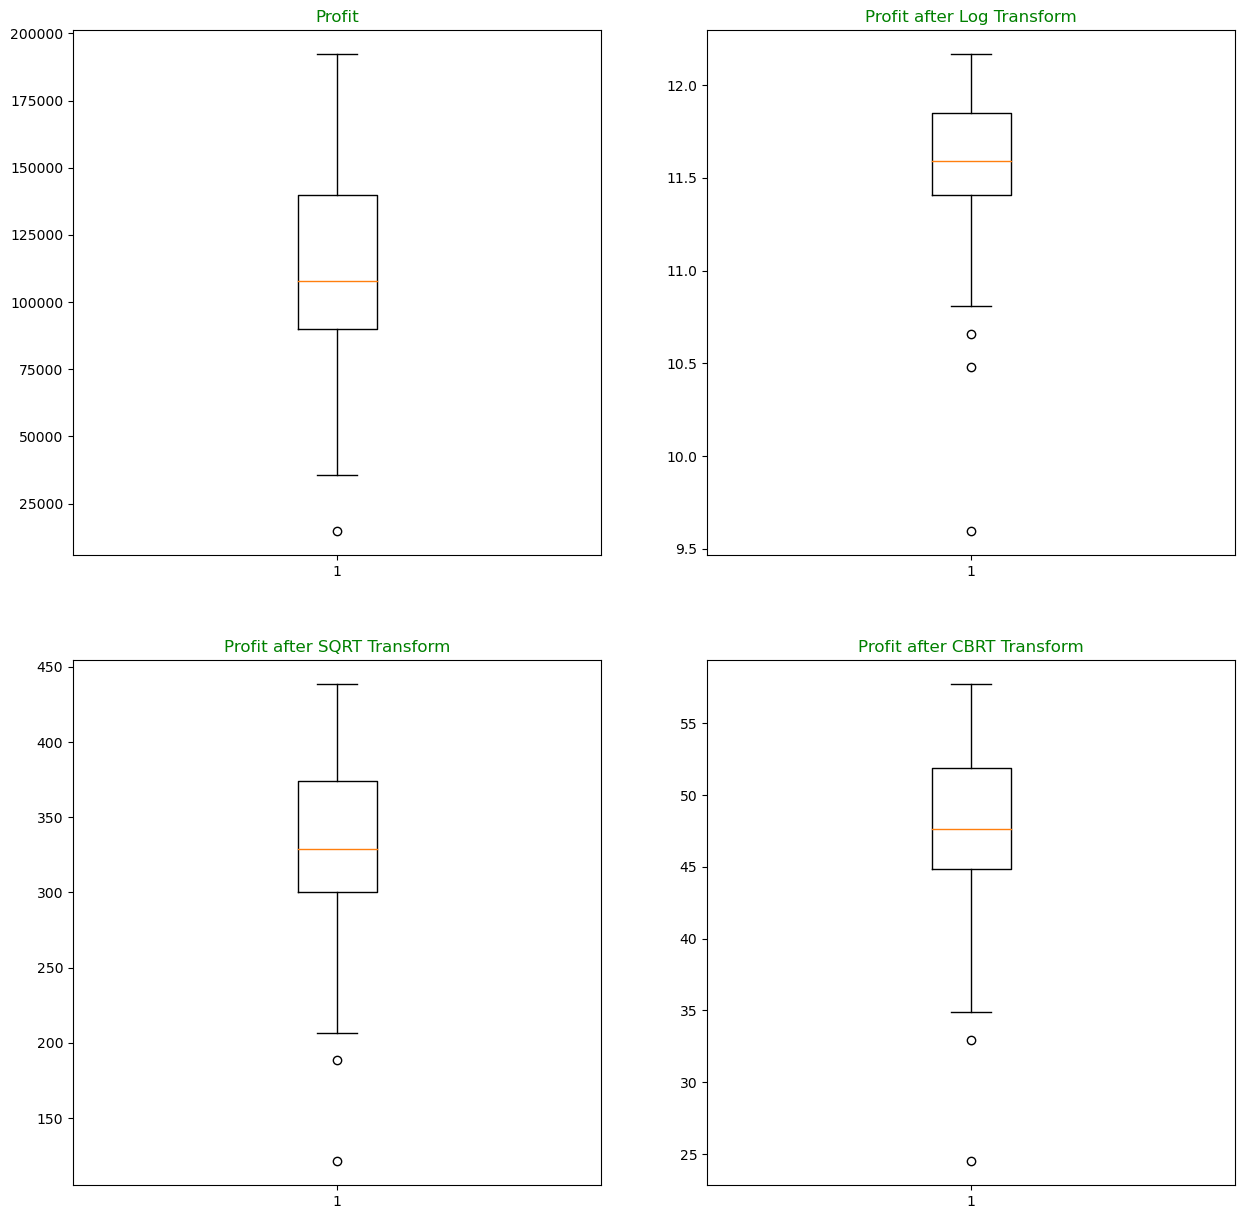

In [19]:
plt.subplots(2,2,figsize=(15,15))
plt.subplot(221)
plt.boxplot(df['Profit'])
plt.title('Profit', fontdict={'color':'green'})
plt.subplot(222)
plt.boxplot(np.log(df['Profit']))
plt.title('Profit after Log Transform', fontdict={'color':'green'})
plt.subplot(223)
plt.boxplot(np.sqrt(df['Profit']))
plt.title('Profit after SQRT Transform', fontdict={'color':'green'})
plt.subplot(224)
plt.boxplot(np.cbrt(df['Profit']))
plt.title('Profit after CBRT Transform', fontdict={'color':'green'})
plt.show()

###### 
+ we can see we couldn't get rid of the outliers by transforming the data, in fact we got even more number of outliers

###### Let us see which is this outlier record

In [20]:
Q1=np.quantile(df.Profit,.25)
Q3=np.quantile(df.Profit,.75)
IQR = Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
Outliers = df.Profit[(df.Profit < LB) | (df.Profit > UB)]
print('The outlier in the boxplot:',Outliers)
df[df.index.isin([49])]

The outlier in the boxplot: 49    14681.4
Name: Profit, dtype: float64


,rnd,adm,mkt,Profit
49,0.0,116983.8,45173.06,14681.4


In [21]:
df.head()

,rnd,adm,mkt,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


###### 
+ We can observe how Record-49 is different from other Records in the DataFrame

###### Now we will Build a regression with this raw data set for comparing with our modified Models in future

In [22]:
raw_model = smf.ols('Profit ~ rnd+adm+mkt', data = df).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        04:04:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnd            0.8057      0.045     17.846      0.000       0.715       0.897
adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
mkt            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ---><font color ='red'> We can observe
+ We got a very high Adj-RSquared Value
+ But The p-values for adm & mkt are higher than our significance value(0.05) which results in accepting the NULL Hypothesis(Beta(1,2,...) = 0 (No Slope))
+ Let's look into this problem

###### The problems occured in the above model might be because of Outliers. Since we have very small data set, let us try not to delete this Outlier without trying some Imputation techniques.

###### Now let us try some of the Outlier imputation techniques 

#### <font color = 'blue'> 1.Median Imputation technique

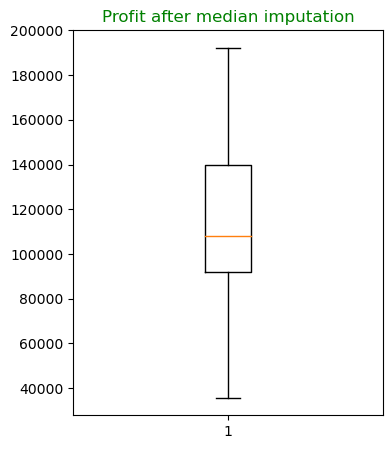

,rnd,adm,mkt,Profit
49,0.0,116983.8,45173.06,107978.19


In [23]:
df1= df.copy()
for i in df1.Profit:
    Q1=np.quantile(df.Profit,.25)
    Q2 = df['Profit'].median()
    Q3=np.quantile(df.Profit,.75)
    IQR = Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    if (i>UB or i<LB):
        df1['Profit']=df1['Profit'].replace(i,Q2)
plt.figure(figsize=[4,5])
plt.boxplot(df1['Profit'])
plt.title('Profit after median imputation', fontdict={'color':'green'})
plt.show()
df1[df1.index.isin([49])]
    

###### <font color = 'green'> we can see the Profit in Record-49 has been changed to the median value of Profit Column

###### Let us build the model with this data

In [24]:
median_model = smf.ols('Profit ~ rnd+adm+mkt', data = df1).fit()
median_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.06e-25
Time:                        04:04:21   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
rnd            0.7472      0.055     13.707      0.000       0.638       0.857
adm           -0.0149      0.062     -0.242      0.810      -0.139       0.109
mkt            0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ---><font color ='red'> We can observe
+ Our Problem with p-values did not resolve and our adj-RSquared got even worse than previous Model

#### <font color = 'blue'> 2.Mean Imputation technique

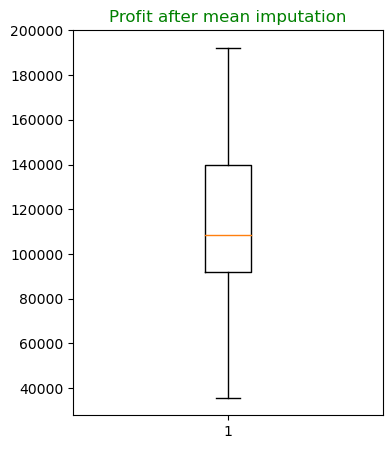

,rnd,adm,mkt,Profit
49,0.0,116983.8,45173.06,112012.6392


In [25]:
df2 = df.copy()
for i in df2.Profit:
    Q1=np.quantile(df.Profit,.25)
    Q3=np.quantile(df.Profit,.75)
    IQR = Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    if (i < LB or i > UB):
        df2['Profit'] = df2['Profit'].replace(i,df['Profit'].mean())
plt.figure(figsize=[4,5])
plt.boxplot(df2['Profit'])
plt.title('Profit after mean imputation', fontdict={'color':'green'})
plt.show() 
df2[df2.index.isin([49])]

###### <font color = 'green'> we can see the Profit in Record-49 has been changed to the mean value of Profit Column

###### Let us build the model with this data

In [26]:
mean_model = smf.ols('Profit ~ rnd+adm+mkt', data = df2).fit()
mean_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.82e-24
Time:                        04:04:21   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
rnd            0.7447      0.057     13.162      0.000       0.631       0.859
adm           -0.0144      0.064     -0.226      0.823      -0.143       0.114
mkt            0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ---><font color ='red'> We can observe
+ Our Problem with p-values did not resolve and our adj-RSquared got even worse than Raw Model

### Now, the only option we have is to Delete this Outlier

In [27]:
#Since we have only one outlier we can use below method
#df3 = df.copy()
#df3 =df3.drop(49)
#df3
#but we will try to build a function to delete all outliers in a big data set which may contain many outliers

In [28]:
df3 = df.copy()
def drop_outliers(data,col):
    upper_extreme = np.quantile(data[col],0.75) + 1.5*((np.quantile(data[col],0.75))-(np.quantile(data[col],0.25)))
    lower_extreme = np.quantile(data[col],0.25) - 1.5*((np.quantile(data[col],0.75))-(np.quantile(data[col],0.25)))
    data.drop(data[data[col]> upper_extreme].index, inplace=True)
    data.drop(data[data[col]< lower_extreme].index, inplace=True)

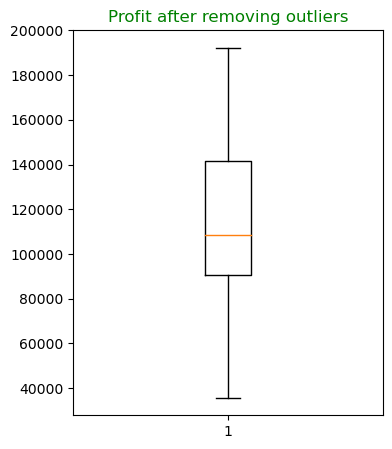

In [29]:
drop_outliers(df3, 'Profit')
plt.figure(figsize=[4,5])
plt.boxplot(df3['Profit'])
plt.title('Profit after removing outliers', fontdict={'color':'green'})
plt.show()


###### We can observe there no outliers now

###### Let us build a regression model for this data

In [30]:
no_outliers_model = smf.ols('Profit~rnd+adm+mkt',data=df3).fit()
no_outliers_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           8.85e-32
Time:                        04:04:21   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rnd            0.7830      0.038     20.470      0.000       0.706       0.860
adm           -0.0222      0.043     -0.518      0.607      -0.109       0.064
mkt            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ---><font color ='red'> We can observe
+ We got a very similar summary to that of raw_model
+ The p-values for adm & mkt are still higher than our significance value(0.05) which results in accepting the NULL Hypothesis(X var does not have good slope and variance w.r.t to Y variable)


###### Since our problem is not solved yet and 'adm'&'mkt' are the columns that are creating this complexity, we will try to build the models with only adm column, only mkt column and combination of both columns

In [31]:
model_adm = smf.ols('Profit~adm',data=df3).fit()
model_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Thu, 16 Feb 2023   Prob (F-statistic):              0.156
Time:                        04:04:21   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
adm            0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model_mkt = smf.ols('Profit~mkt',data=df3).fit()
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.30e-09
Time:                        04:04:21   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.574      8.428      0.000    4.88e+04    7.94e+04
mkt            0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model_adm_mkt = smf.ols('Profit~adm+mkt',data=df3).fit()
model_adm_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           6.59e-10
Time:                        04:04:21   Log-Likelihood:                -563.45
No. Observations:                  49   AIC:                             1133.
Df Residuals:                      46   BIC:                             1139.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.519e+04   1.71e+04      1.474      0.147   -9208.231    5.96e+04
adm            0.3152      0.126      2.508      0.016       0.062       0.568
mkt            0.2356      0.029      8.027      0.000       0.177       0.295
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF

In [34]:
rsq_rnd = smf.ols('rnd~adm+mkt',data=df3).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)

rsq_adm = smf.ols('adm~rnd+mkt',data=df3).fit().rsquared
vif_adm = 1/(1-rsq_adm)

rsq_mkt = smf.ols('mkt~rnd+adm',data=df3).fit().rsquared
vif_mkt = 1/(1-rsq_mkt)

vif = pd.DataFrame({'Variables':['rnd','adm','mkt'],'R-Squared':[rsq_rnd,rsq_adm,rsq_mkt],'VIF':[vif_rnd,vif_adm,vif_mkt]})
vif

,Variables,R-Squared,VIF
0,rnd,0.579435,2.377754
1,adm,0.149061,1.175172
2,mkt,0.553563,2.239957


#### --> <font color = 'red'> From all the Summaries of all Models
+ Among all the models,model with both 'adm' and 'mkt' perform well
+ But we can't use both in our final model, we will go with the column that performed well individually, i.e, 'mkt' column

In [35]:
final_model = smf.ols('Profit~rnd+mkt',data=df3).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.74e-33
Time:                        04:04:22   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
rnd            0.7754      0.035     22.136      0.000       0.705       0.846
mkt            0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ---><font color='red'> We can observe
 + The Adj-RSquared value is almost same 
 + But now We don't have problem of high p-values

In [36]:
final_model.params

Intercept    49785.269847
rnd              0.775384
mkt              0.027446
dtype: float64

In [37]:
print(final_model.tvalues,'\n',final_model.pvalues)

Intercept    21.261366
rnd          22.135643
mkt           2.104326
dtype: float64 
 Intercept    1.970460e-25
rnd          3.628510e-26
mkt          4.084443e-02
dtype: float64


## <font color = 'red'> Since
+ all the p-values are less than Significance value(0.05) we can reject the NULL Hypothesis
+ Therefore X variables have good slope and variance w.r.t Y                                     

In [38]:
final_model.rsquared,final_model.rsquared_adj

(0.9610856807456628, 0.9593937538215612)

### Determination Coefficient = Adj-rsquared value = 0.95 ; very good fit >= 85%

# <font color = 'red'> Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

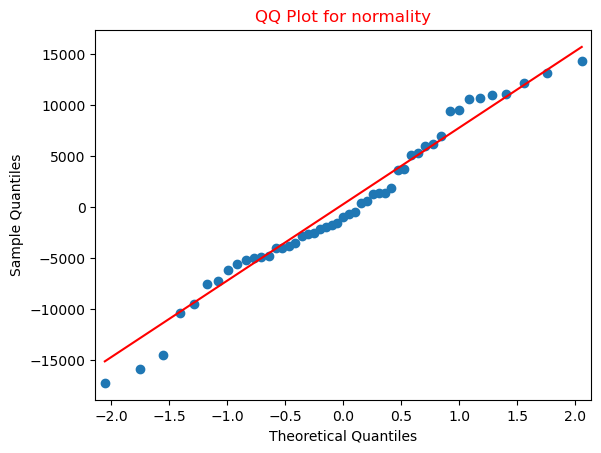

In [39]:
sm.qqplot(final_model.resid, line='q')
plt.title('QQ Plot for normality', fontdict={'color':'red'})
plt.show()

###### 
+ The Residual curve is almost Normal with slightly Right Skewed

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [40]:
def get_standard_values(vals):
    return (vals-vals.mean())/(vals.std())

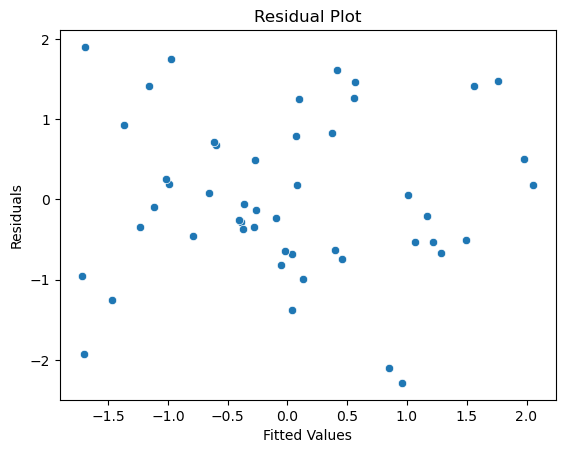

In [41]:
sns.scatterplot(x= get_standard_values(final_model.fittedvalues), y= get_standard_values(final_model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## <font color='red'> As you can notice in the above plot
+ The Model have Homoscedasciticity of Errors. 
+ The Residual(i.e Residual  = Actual Value - Predicted Value) and the Fitted values do not share any Pattern. 
+ Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

### <font color ='red'> Residuals vs Regressors

eval_env: 1


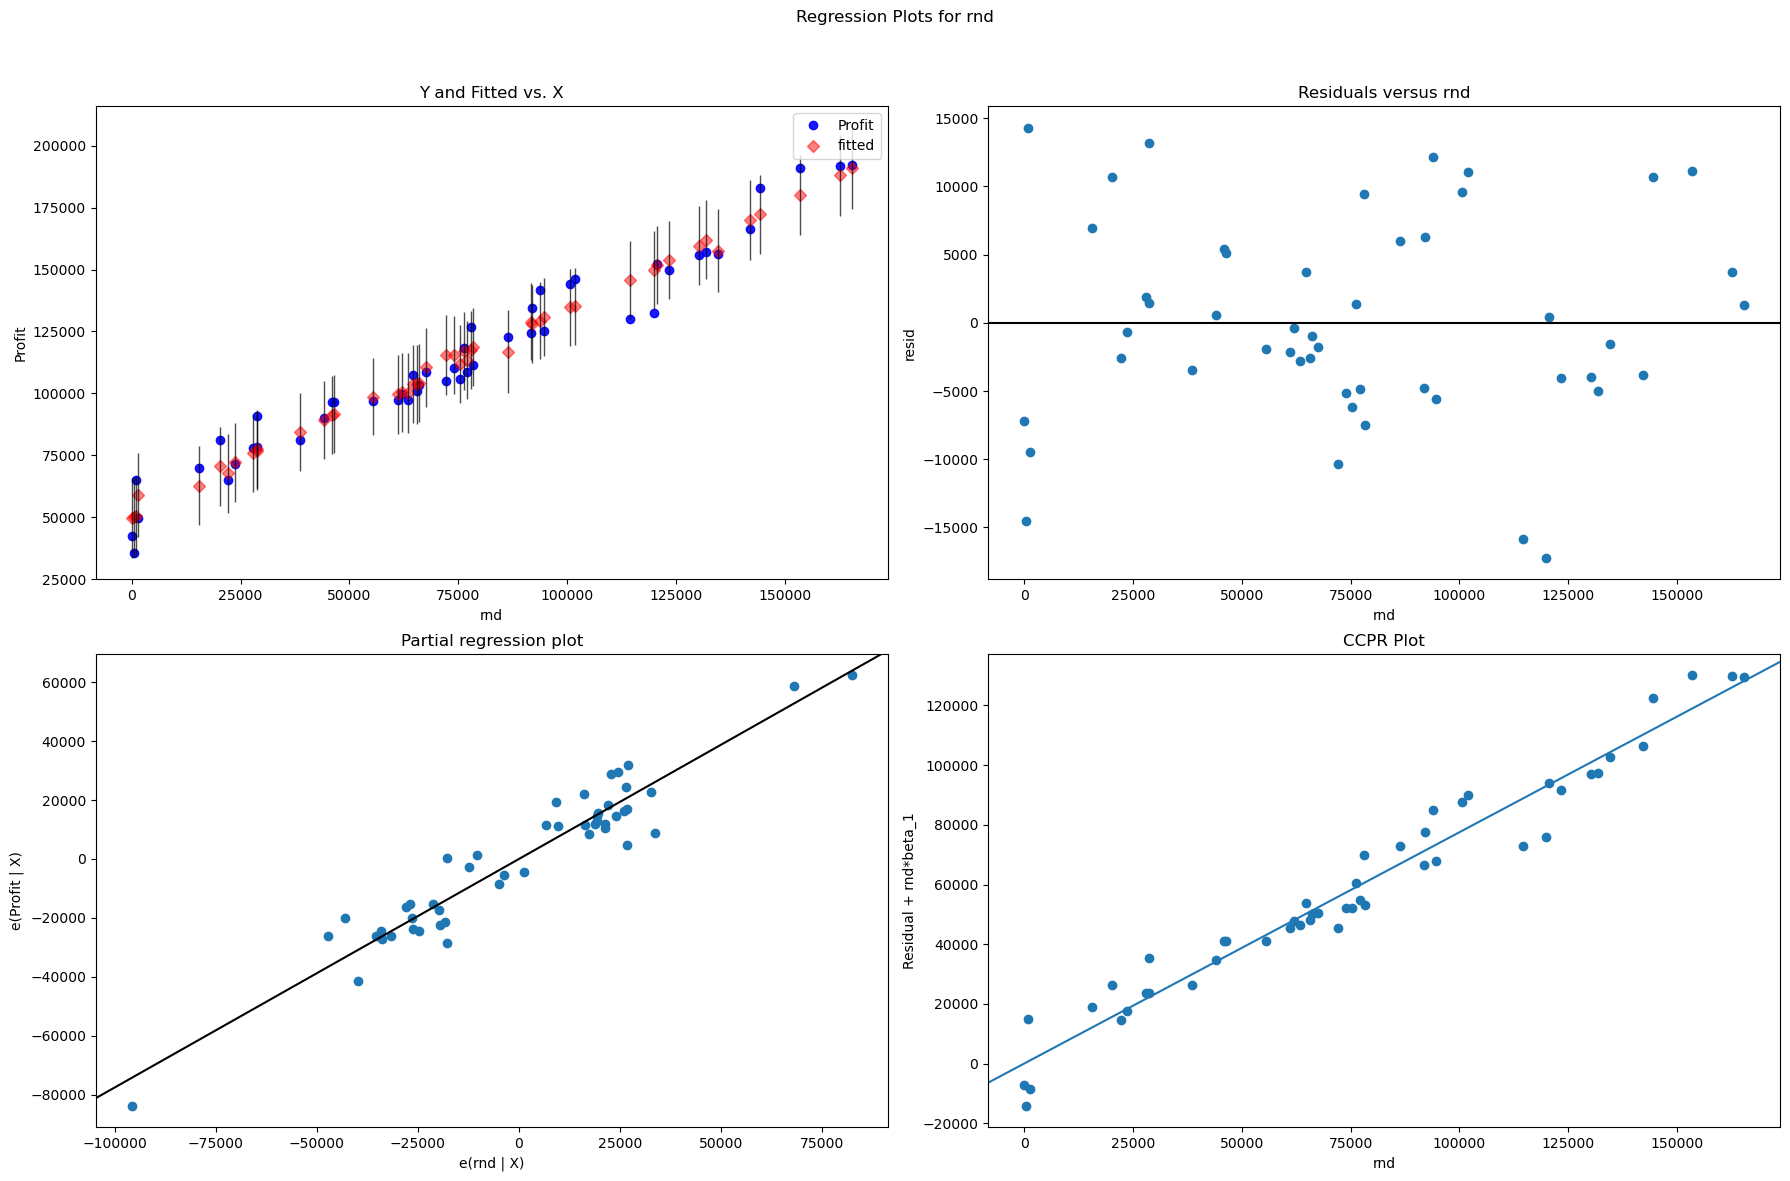

In [42]:
sm.graphics.plot_regress_exog(final_model,'rnd', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


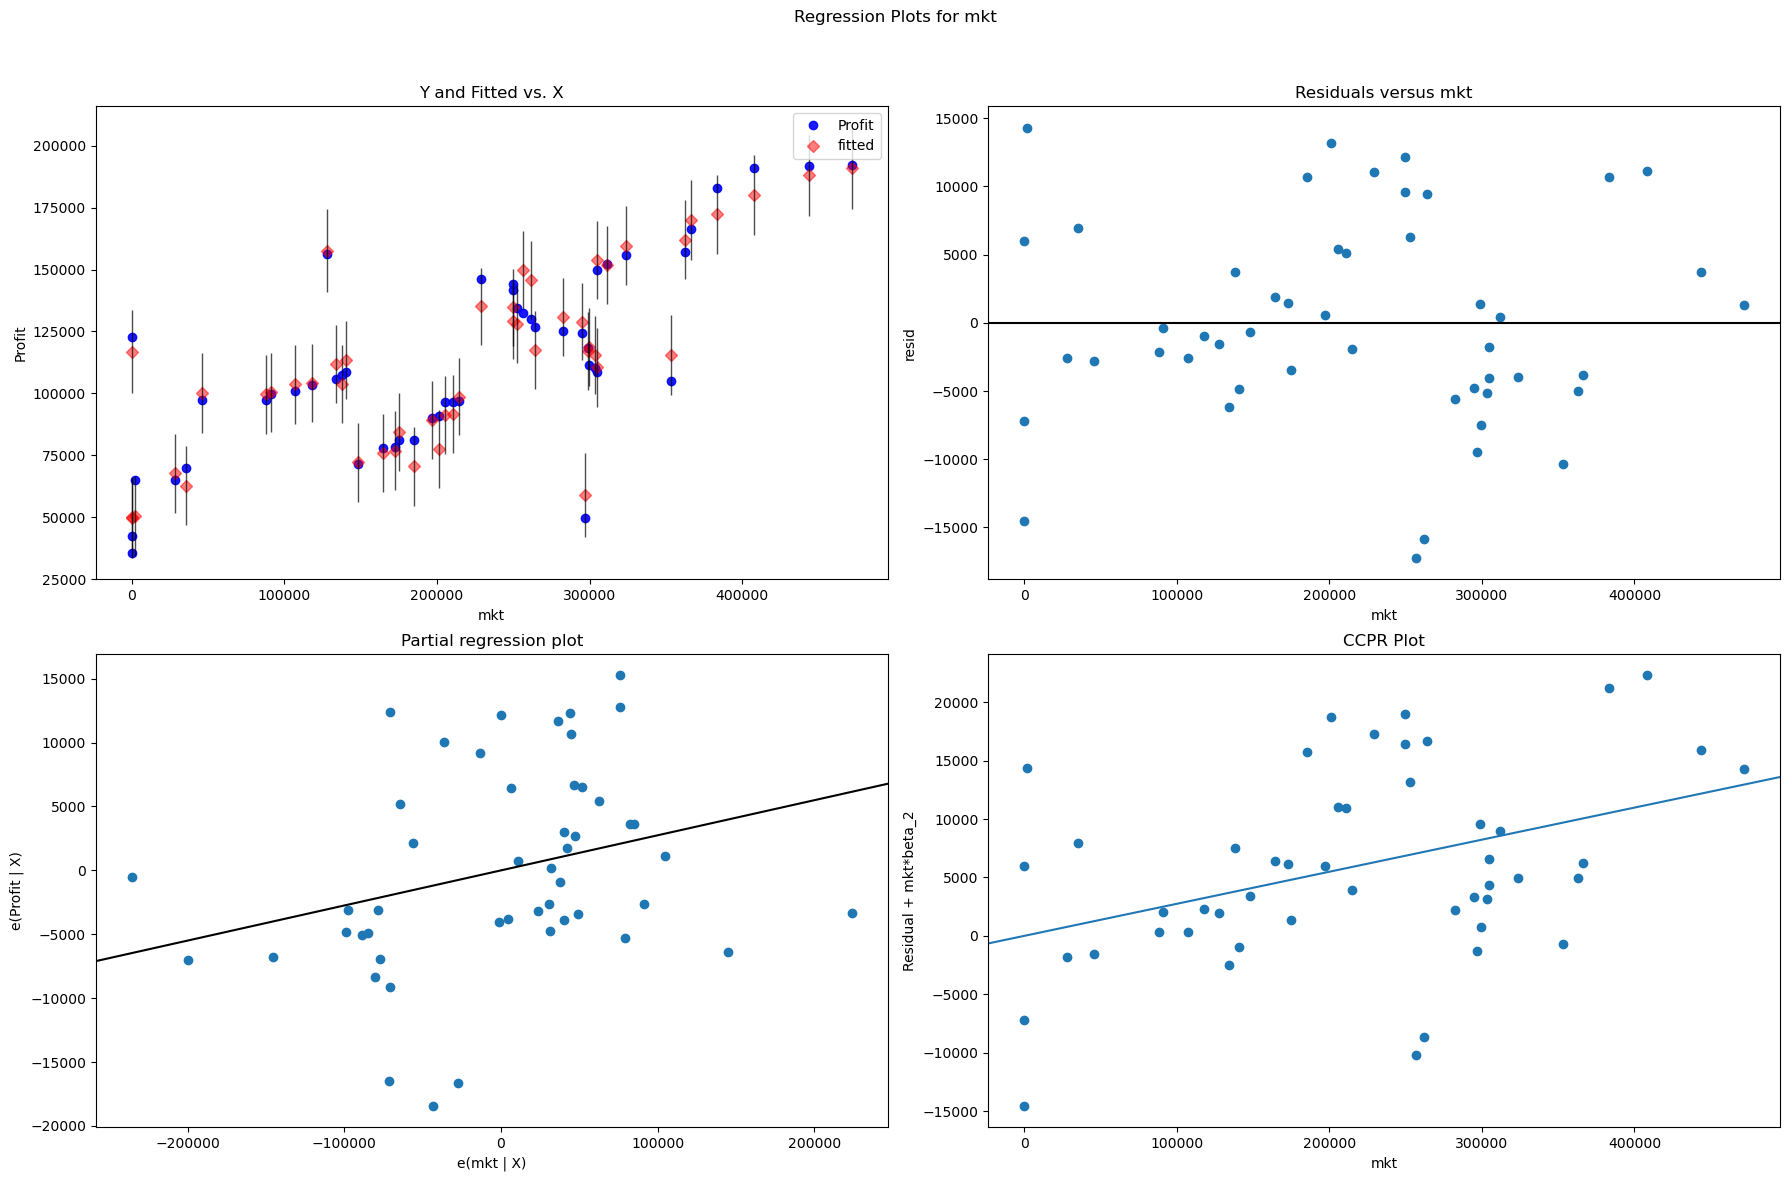

In [43]:
sm.graphics.plot_regress_exog(final_model,'mkt', fig =plt.figure(figsize=[18,12]))
plt.show()

In [44]:
k=df3.shape[1]
n=df3.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


In [45]:
(c,_) = final_model.get_influence().cooks_distance

<StemContainer object of 3 artists>

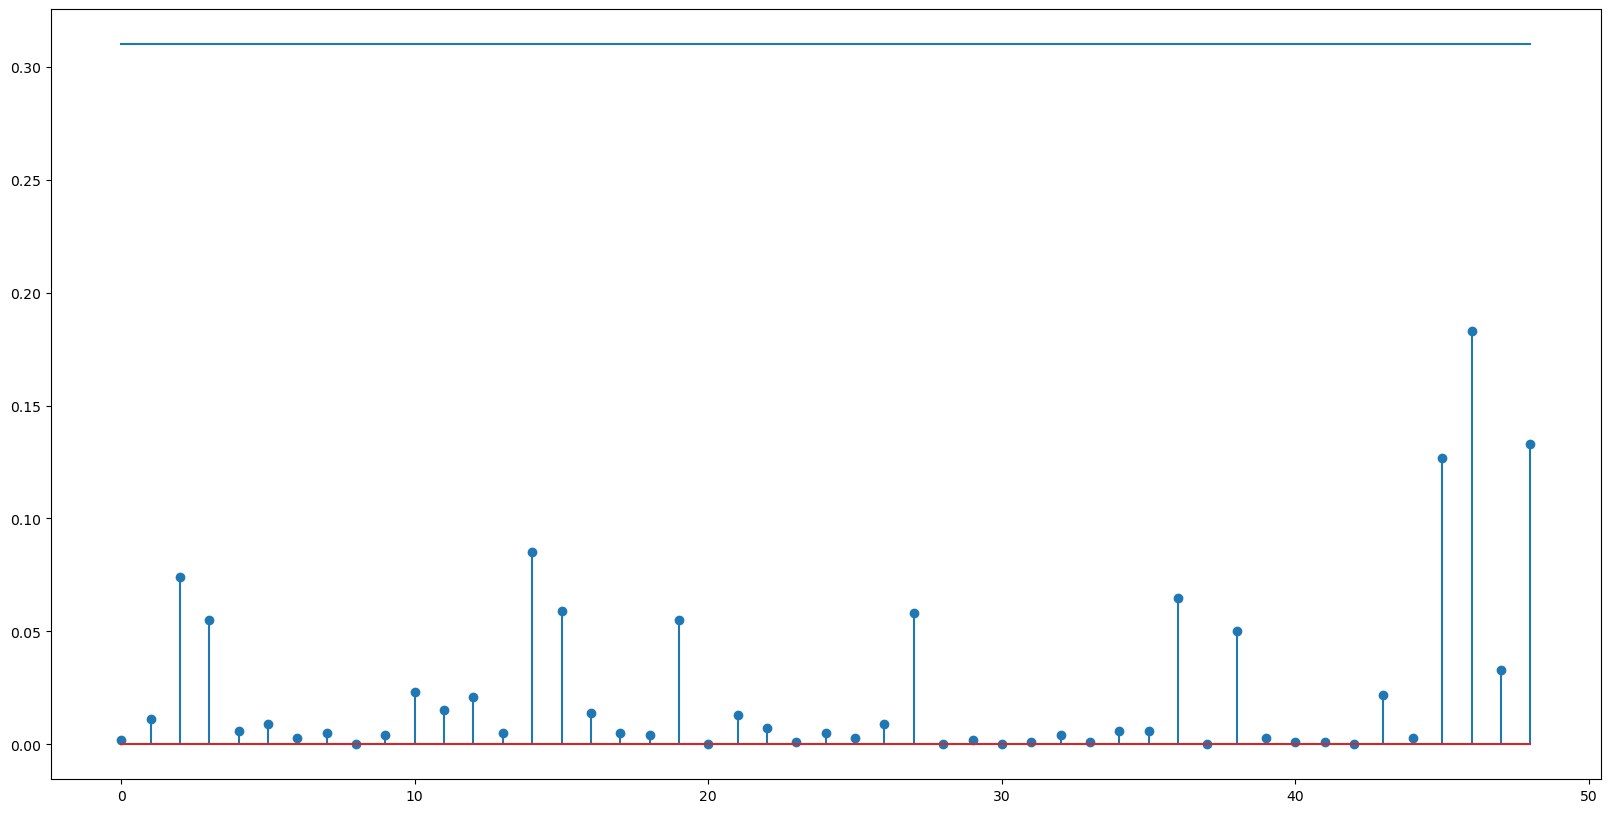

In [46]:
plt.figure(figsize=[20,10])
x=[0,48]
y=[0.31,0.31]
plt.plot(x,y)
plt.stem(np.arange(len(df3)), np.round(c, 3))

###### <font color='red'>We can see ,
###### in the above plot, no point has cook's distance more than the leverage cut-off 

## <font color = 'red'> Model Validation

### Comparing different models with respect to their Root Mean Squared Errors


In [48]:
Predicted = data.copy()
Predicted['Predicted Profit'] = final_model.predict(df)
Predicted

,R&D Spend,Administration,Marketing Spend,Profit,Predicted Profit
0,165349.20,136897.80,471784.10,192261.83,190942.726927
1,162597.70,151377.59,443898.53,191792.06,188043.924520
2,153441.51,101145.55,407934.54,191050.39,179957.312472
3,144372.41,118671.85,383199.62,182901.99,172246.416164
4,142107.34,91391.77,366168.42,166187.94,170022.687457
5,131876.90,99814.71,362861.36,156991.12,161999.405410
6,134615.46,147198.87,127716.82,156122.51,157669.178690
7,130298.13,145530.06,323876.68,155752.60,159705.298181
8,120542.52,148718.95,311613.29,152211.77,151804.380605
9,123334.88,108679.17,304981.62,149759.96,153787.521922


###### We can see that, exept for outlier (Row-49) almost every record has almost same Predicted and Profit Values

In [49]:
Models = pd.DataFrame({'Model Name':['Model with raw data','Model with NO Outliers','Final Model'],
                      'R-Squared value':[raw_model.rsquared,no_outliers_model.rsquared,final_model.rsquared],
                      'Adj R-Squared value':[raw_model.rsquared_adj,no_outliers_model.rsquared_adj,final_model.rsquared_adj],
                      'RMSE Value':[np.sqrt(raw_model.mse_resid),np.sqrt(no_outliers_model.mse_resid),np.sqrt(final_model.mse_resid)]})
Models

,Model Name,R-Squared value,Adj R-Squared value,RMSE Value
0,Model with raw data,0.950746,0.947534,9232.334837
1,Model with NO Outliers,0.961316,0.958737,7753.807752
2,Final Model,0.961086,0.959394,7691.884749


### <font color ='red'> We can Observe
 

#### The Model with  Highest Adj R-Squared and Lowest RMSE value is <font color ='green'> Final Model